# Statistics

### Normal Distribution

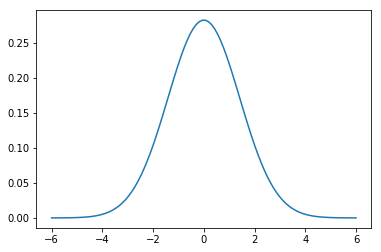

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

mu = 0          # mean
variance = 2    # variance
sigma = np.sqrt(variance)       # standard deviation\n
x = np.linspace(mu-3*variance, mu+3*variance, 100)
plt.plot(x, norm.pdf(x, mu, sigma))

### Fither F-distribution

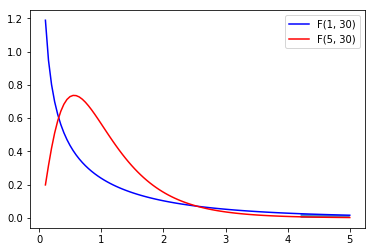

In [6]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline

fvalues = np.linspace(.1, 5., 100)

# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
plt.legend()
# cdf(x, df1, df2): Cumulative distribution function of F.
# ie.
proba_at_f_inf_3 = f.cdf(3, 1, 30) # P(F(1,30) < 3)
# ppf(q, df1, df2): Percent point function (inverse of cdf) at q of F.
f_at_proba_inf_95 = f.ppf(.95, 1, 30) # q such P(F(1,30) < .95)
assert f.cdf(f_at_proba_inf_95, 1, 30) == .95
# sf(x, df1, df2): Survival function (1 - cdf) at x of F.
proba_at_f_sup_3 = f.sf(3, 1, 30) # P(F(1,30) > 3)
assert proba_at_f_inf_3 + proba_at_f_sup_3 == 1
# p-value: P(F(1, 30)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, f.pdf(low_proba_fvalues, 1, 30),
alpha=.8, label="P < 0.05")

plt.show()

## Student t-distribution

#### One Sample t-test
The one sample t-tet is used to determine whether a sample comes from a population with a specific mean. For example if you want to test if the averager height of a population is 1.75m. 

1. __Model the data:__ Assume that height is normally distributed: X ~ N(𝜇, 𝜎).\
2. __Fit: estimate the model parameters:__ 𝑥, 𝑠 ¯ 𝑥 are the estimators of 𝜇, 𝜎.
3. __Test:__ in testing the null hypothesis that the population mean is equal to a specified value 𝜇0 = 1.75, one uses the statistic:

![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2015/09/t-score.jpg)

Although the parent populatino does not need to be normally distributed, the distributino of the populatino of sample means $$\bar{x}$$, is assumbed to be normal. By the central limit theorem, if the smapling of the parent population is independent then the sample means will be approximately normal. 

Given the following samples, test whether its true mean is 1.75.

In [9]:
import numpy as np

x = [1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87]

xbar = np.mean(x)        # sample mean
mu0 = 1.75               # hypothesized value
s = np.std(x, ddof=1)    # sample standard deviation
n = len(x)               # sample size

tobs = (xbar - mu0) / (s / np.sqrt(n))
print(tobs)

2.3968766311585883


Find the `p value` which is the probability to observe a value `t` more extremem than the observed one `tobs` under the `null hypothesis: H0: P(t > tobs | H0)`

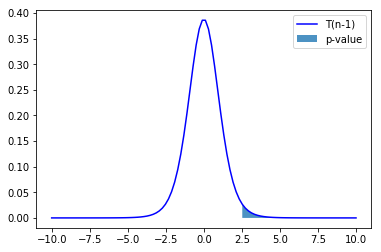

In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt

tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tobs]
plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), 
                 alpha = .8, label = "p-value")
_ = plt.legend()

### Pearson Correlation Test - Pairwaise Association
#### Test Association between two quantitative variables

Test the correlation coefficient of two quantitative variables. The test calculates a Pearson correlation coefficient and
the 𝑝-value for testing non-correlation.


In [20]:
import numpy as np
import scipy.stats as stats
n = 50
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)
# Compute with scipy
cor, pval = stats.pearsonr(x, y)
cor

0.8501828255982474

In [18]:
import scipy.stats as stats
height = np.array([ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87,
1.66, 1.71, 1.73, 1.64, 1.70, 1.60, 1.79, 1.73, 1.62, 1.77])
grp = np.array(["M"] * 10 + ["F"] * 10)
# Compute with scipy
print(stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True))


Ttest_indResult(statistic=3.5511519888466885, pvalue=0.00228208937112721)
